In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data_excel/Dannye_FNB.xlsx', header=2)

df = df[:25] # delete footnotes
df.drop(columns=['№ п/п', 'Январь 2008*'], inplace=True)
df.drop(index=0, inplace=True)

In [3]:
# Melt the dataframe to long format
df_long = pd.melt(
    df,
    id_vars=["Показатель"],
    var_name="ds",
    value_name="y"
)

# Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### Fund volume in RUB

13:41:32 - cmdstanpy - INFO - Chain [1] start processing
13:41:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


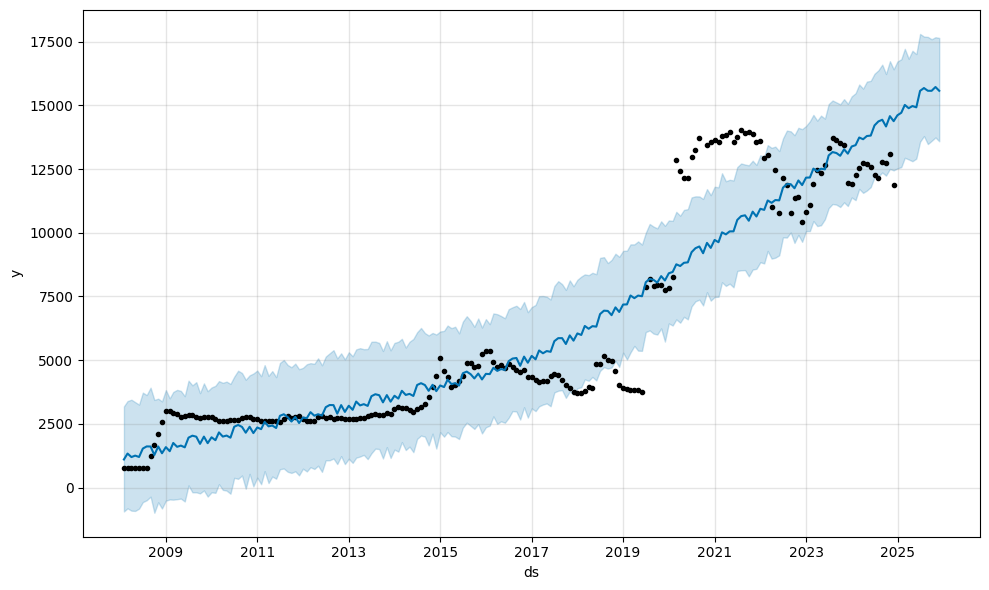

In [ ]:
# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем на конец периода"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

# Initialize and fit the model
model = Prophet(growth= 'linear')
model.fit(prophet_data)

# Create future dates
future = model.make_future_dataframe(periods=12, freq="M")  # Forecast 12 months

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
203,2024-12-31,14611.940691,12527.708864,16721.601271
204,2025-01-31,14711.882859,12578.366789,16813.393386
205,2025-02-28,15019.062703,12943.370057,17221.256230
206,2025-03-31,14889.681469,12879.152347,16830.787315
207,2025-04-30,14975.181343,12809.146370,17144.087041
208,2025-05-31,14924.197768,12911.130525,17013.679291
209,2025-06-30,15570.794580,13574.046266,17804.662511
210,2025-07-31,15681.649655,13795.473613,17702.117891
211,2025-08-31,15574.325566,13482.396510,17688.535114
212,2025-09-30,15572.373319,13607.336591,17597.398482


### Fund volume in USD

14:37:36 - cmdstanpy - INFO - Chain [1] start processing
14:37:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


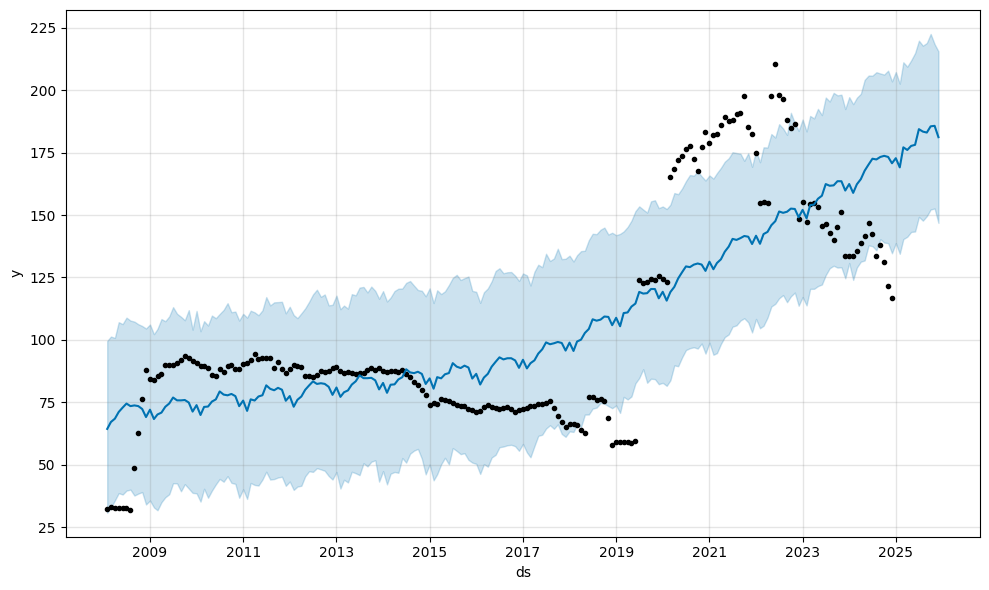

In [7]:
# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем средств фонда на конец периода (млрд. долларов США)"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

# Initialize and fit the model
model = Prophet()
model.fit(prophet_data)

# Create future dates
future = model.make_future_dataframe(periods=12, freq="M")  # Forecast 12 months

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
203,2024-12-31,172.771982,138.751856,207.279498
204,2025-01-31,169.094289,134.463772,202.619668
205,2025-02-28,177.118718,140.354204,211.184749
206,2025-03-31,176.061431,141.302645,209.424477
207,2025-04-30,177.680053,143.230371,211.905056
208,2025-05-31,178.121992,143.411050,214.882856
209,2025-06-30,184.396001,149.259644,219.840346
210,2025-07-31,183.419947,147.746170,217.831463
211,2025-08-31,183.035123,149.563325,218.897634
212,2025-09-30,185.528913,152.211173,222.532236


## Logistic regression

15:40:45 - cmdstanpy - INFO - Chain [1] start processing
15:40:45 - cmdstanpy - INFO - Chain [1] done processing


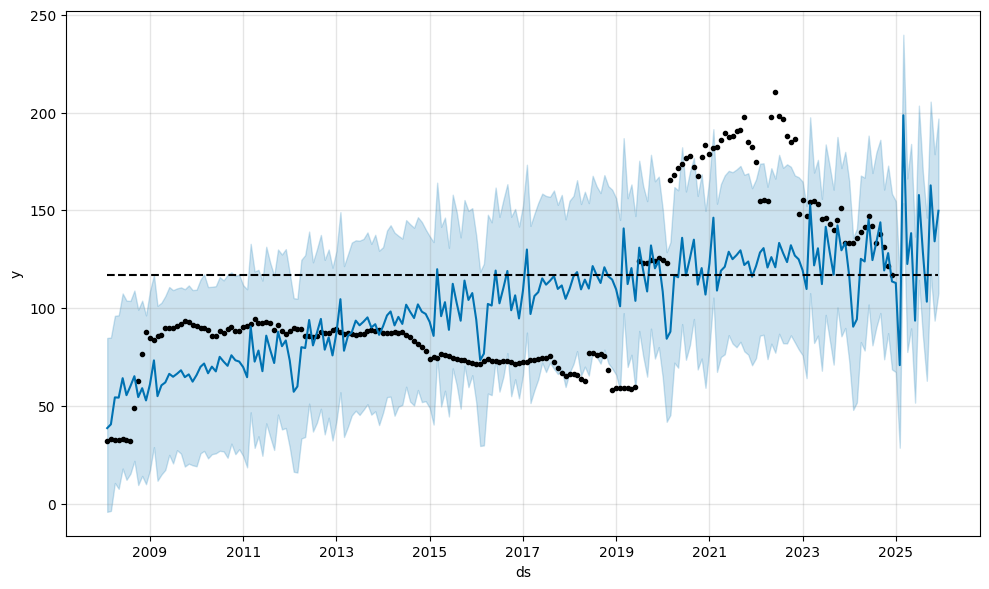

In [59]:
# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем средств фонда на конец периода (млрд. долларов США)"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

# Cap
prophet_data['cap'] = prophet_data['y'][-1:].item()

# Initialize and fit the model
model = Prophet(growth= 'logistic',
                seasonality_mode='multiplicative',
                changepoints=['2024-01-01'], 
                changepoint_range=0.9, 
                changepoint_prior_scale = 0.15,)
model.fit(prophet_data)

# Create future dates
future = model.make_future_dataframe(periods=12, freq="ME")  # Forecast 12 months
future['cap'] = prophet_data['y'][-1:].item()

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [60]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
203,2024-12-31,112.854038,67.247454,154.770499
204,2025-01-31,70.803961,28.563084,115.371493
205,2025-02-28,198.677741,153.747448,239.884932
206,2025-03-31,122.570362,77.551530,166.332237
207,2025-04-30,138.349700,89.642773,184.011010
208,2025-05-31,93.578469,51.617650,136.568654
209,2025-06-30,157.866641,114.434177,203.610931
210,2025-07-31,128.747641,85.830162,169.572345
211,2025-08-31,103.290045,62.804347,146.314753
212,2025-09-30,162.809536,117.797695,205.656182


* `n_changepoints`, `changepoint_range`, `changepoint_prior_scale`


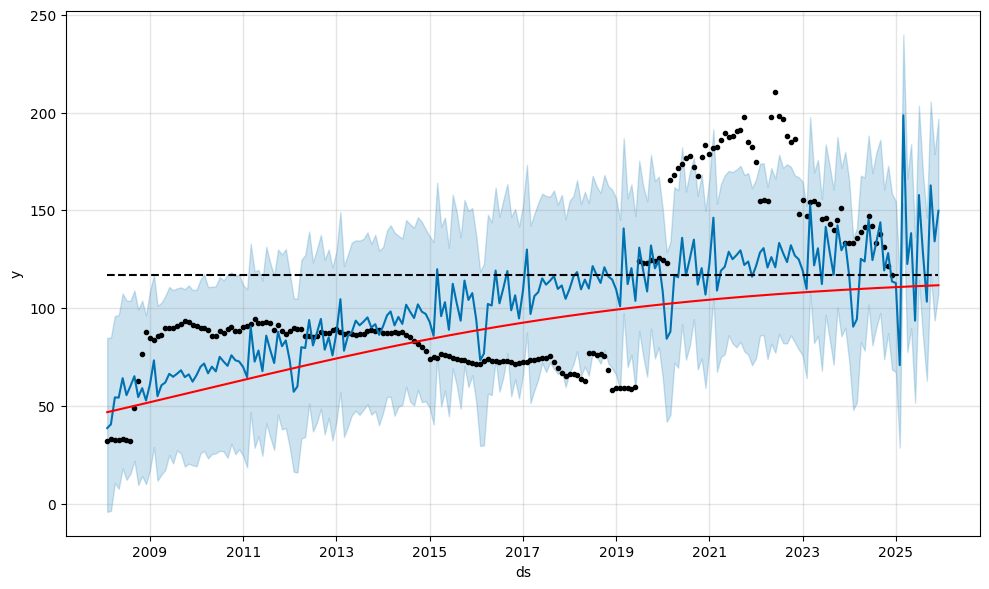

In [61]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [64]:
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_data)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)


15:57:42 - cmdstanpy - INFO - Chain [1] start processing
15:57:42 - cmdstanpy - INFO - Chain [1] done processing
15:57:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:57:42 - cmdstanpy - INFO - Chain [1] start processing
15:57:43 - cmdstanpy - INFO - Chain [1] done processing
15:57:56 - cmdstanpy - INFO - Chain [1] start processing
15:57:56 - cmdstanpy - INFO - Chain [1] done processing
15:57:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:57:56 - cmdstanpy - INFO - Chain [1] start processing
15:57:56 - cmdstanpy - INFO - Chain [1] done processing
15:58:10 - cmdstanpy - INFO - Chain [1] start processing
15:58:10 - cmdstanpy - INFO - Chain [1] done processing
15:58:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  39.120763
1                     0.001                     0.10  39.177105
2                     0.001                     1.00  39.447144
3                     0.001                    10.00  39.571094
4                     0.010                     0.01  38.543377
5                     0.010                     0.10  38.068546
6                     0.010                     1.00  38.314637
7                     0.010                    10.00  38.074552
8                     0.100                     0.01  37.647215
9                     0.100                     0.10  38.270715
10                    0.100                     1.00  38.610190
11                    0.100                    10.00  38.169397
12                    0.500                     0.01  32.922153
13                    0.500                     0.10  34.131162
14                    0.500             